##I.인공지능과 분류

### **1. 와인 경작자 분류**

In [33]:
#코드 11-1.와인데이터 확인
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

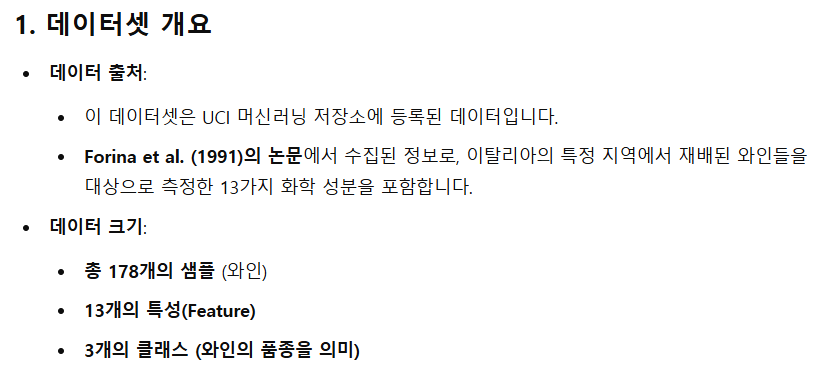

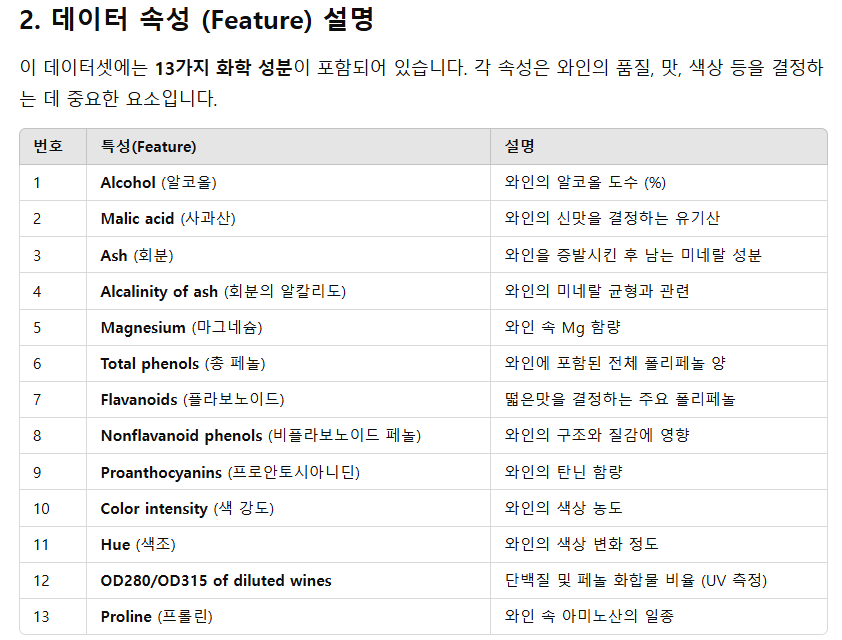

In [34]:
#코드 11-2.원시 데이터에서 학습 데이터로 변환
import pandas as pd
import numpy as np

wine_feature = wine.data
wine_label = wine.target

df_wine = pd.DataFrame(data=wine_feature, columns=wine.feature_names)
df_wine['label'] = wine_label
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [35]:
#코드 11-3.테스트 데이터 분할
from sklearn.model_selection import train_test_split

df_wine = df_wine.astype({'label':'int'})
train, test = train_test_split(df_wine, test_size=0.3, random_state=0,
                               stratify=df_wine['label'])

train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]

test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

In [36]:
#코드 11-4.K-NN분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#학습하기
model = KNeighborsClassifier()
model.fit(train_X, train_Y)

#테스트와 평가하기
pred_knn = model.predict(test_X)
print('KNN 알고리즘 분류 정확도:', metrics.accuracy_score(pred_knn, test_Y))

KNN 알고리즘 분류 정확도: 0.7222222222222222


/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



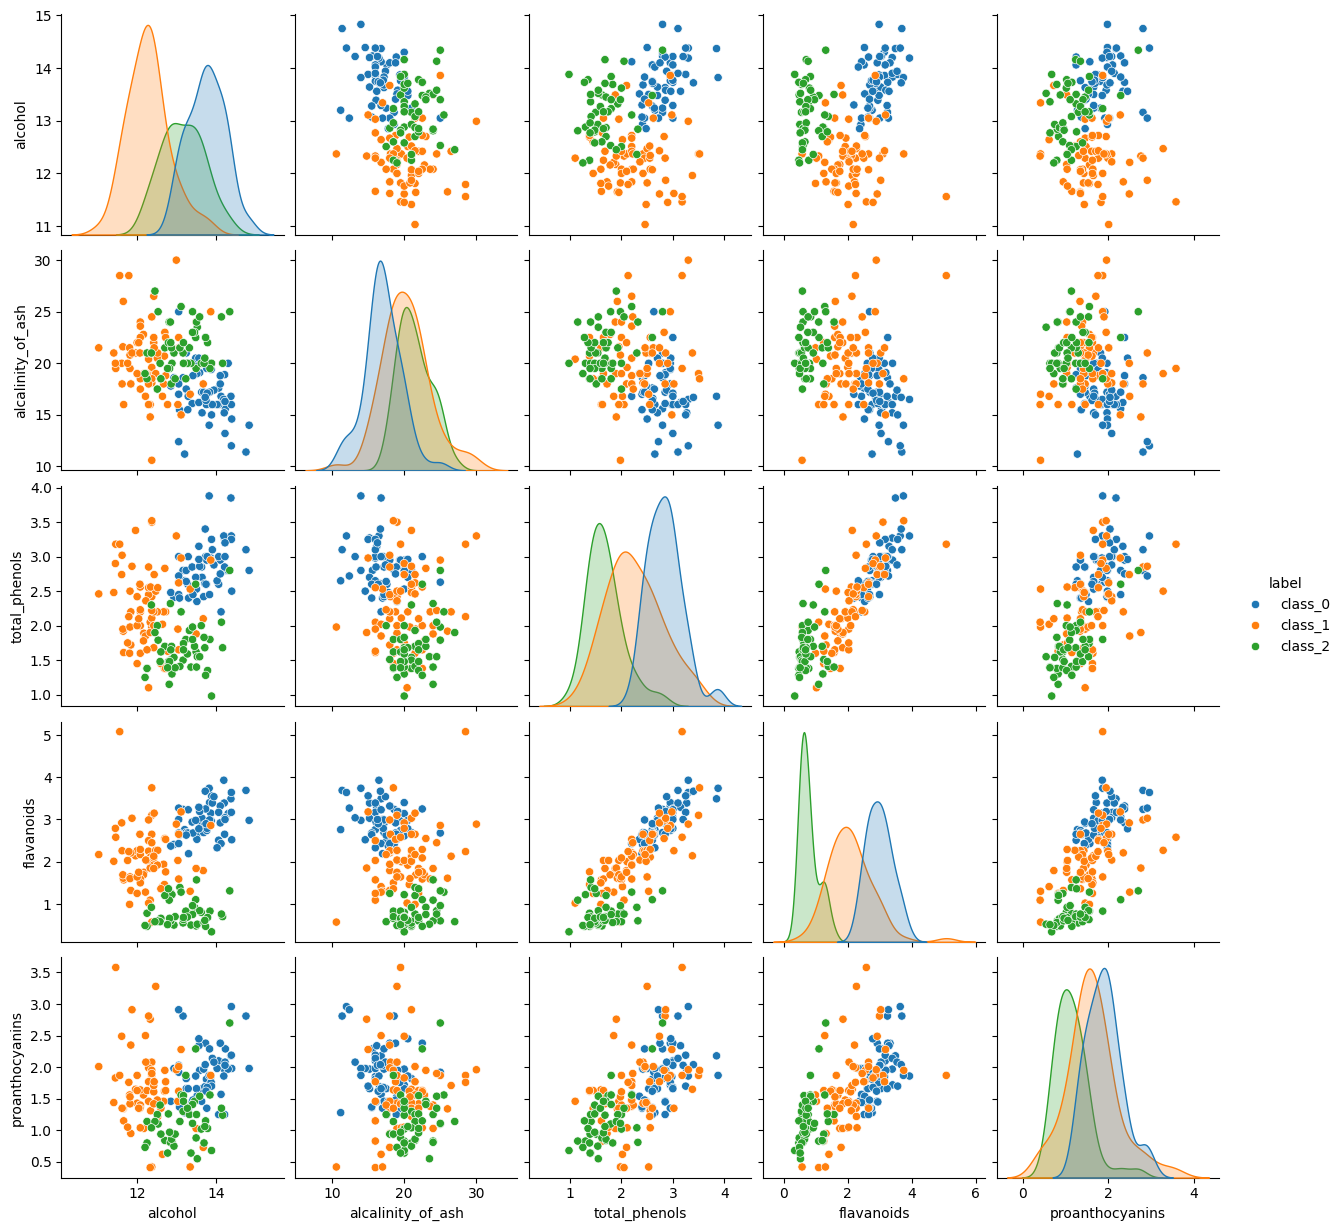

In [37]:
#코드 11-5.특성 간 상관관계와 레이블 분포를 시각화
import seaborn as sns

df_analysis = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype='category')
wine_class = wine_class.cat.rename_categories(wine.target_names)
df_analysis['label'] = wine_class

sns.pairplot(vars=['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids', 'proanthocyanins'],\
             hue='label', data=df_analysis)

In [38]:
#코드 11-6.랜덤 포레스트 분류
from sklearn.ensemble import RandomForestClassifier

df_wine_proc = df_wine.drop(labels=['alcalinity_of_ash', 'total_phenols',
                                    'proanthocyanins'], axis=1)
df_wine_proc = df_wine_proc.astype({'label':'int'})

train, test = train_test_split(df_wine_proc, test_size=0.3, random_state=0,\
                               stratify=df_wine_proc['label'])
train_X=train[train.columns[:10]]
train_Y=train[train.columns[10:]]
test_X=test[test.columns[:10]]
test_Y=test[test.columns[10:]]

model = RandomForestClassifier(n_estimators=3)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF, test_Y))

랜덤 포레스트 알고리즘 분류 정확도: 0.9629629629629629


/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### **2. 화이트와인과 레드와인 분류**

In [39]:
#코드 11-7.데이터프레임 생성
import numpy as np
import pandas as pd
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


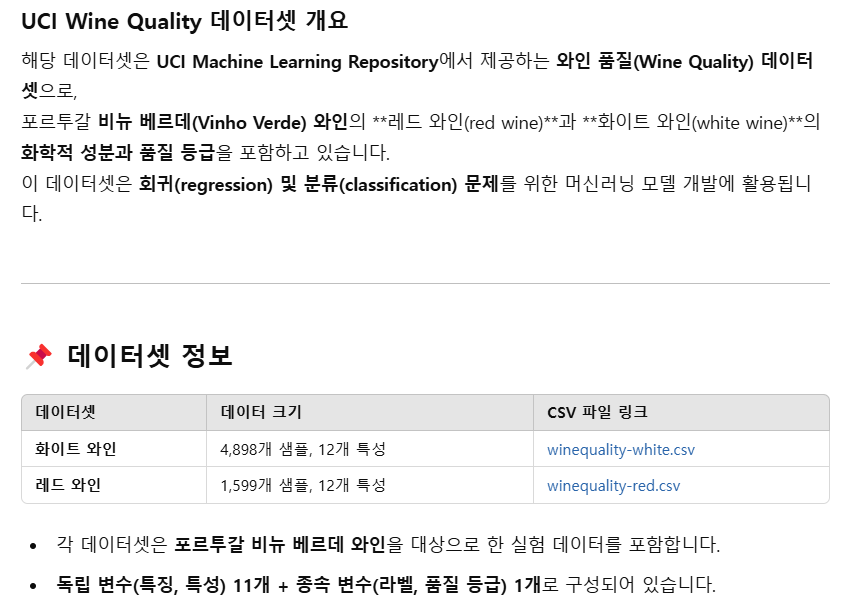

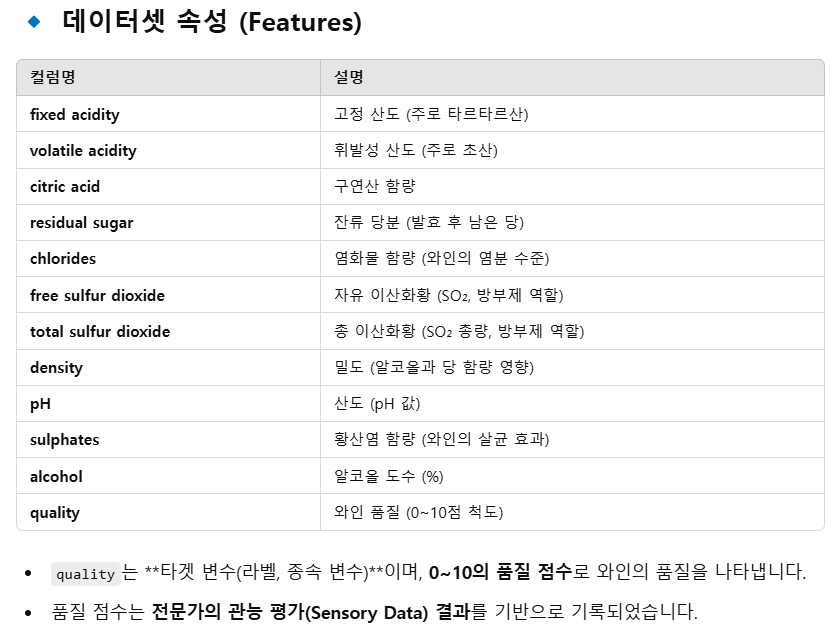

In [40]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
#코드 11-8.레이블 열 추가
df_white['class'] = 1
df_red['class'] = 0

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [42]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [43]:
#코드 11-9.데이터셋 병합
df_wine_category = pd.concat([df_white, df_red])

In [44]:
#코드 11-10.학습 데이터 분할
from sklearn.model_selection import train_test_split

df_wine_category = df_wine_category.astype({'class':'int'})
train, test = train_test_split(df_wine_category, test_size=0.3, random_state=0,\
                               stratify=df_wine_category['class']) 

train_X = train[train.columns[:12]]
train_Y = train[train.columns[12:]]
test_X = test[test.columns[:12]]
test_Y = test[test.columns[12:]]

train_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2126,6.5,0.43,0.28,12.0,0.056,23.0,174.0,0.99860,3.31,0.55,9.3,5
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.6,6
725,6.4,0.39,0.21,1.2,0.041,35.0,136.0,0.99225,3.15,0.46,10.2,5
4557,6.1,0.37,0.46,12.0,0.042,61.0,210.0,0.99700,3.17,0.59,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8
2032,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6
3239,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6


In [45]:
#코드 11-11.라이브러리
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [46]:
#코드 11-12.SVM 이진분류
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred_SVM = model.predict(test_X)

print('SVM 알고리즘 분류 정확도:', metrics.accuracy_score(pred_SVM, test_Y))
print(classification_report(pred_SVM, test_Y))

SVM 알고리즘 분류 정확도: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.99      0.99      0.99      1484

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [47]:
#코드 11-13.랜덤 포레스트 이진분류
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('Random Forest 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF,test_Y))
print(classification_report(pred_RF,test_Y))

/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest 알고리즘 분류 정확도: 0.9933333333333333
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       473
           1       1.00      0.99      1.00      1477

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



##II.인공지능과 예측

### **1. 와인 등급 예측**

In [48]:
#코드 11-14.레이블 분포 확인
import numpy as np
import pandas as pd
import plotly.express as px
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases\
/wine-quality/winequality-white.csv', sep=';')
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases\
/wine-quality/winequality-red.csv', sep=';')
df_wine_predic = pd.concat([df_white, df_red])
px.histogram(df_wine_predic.quality)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'variable=quality<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'quality',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'quality',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': {'bdata': ('BgYGBgYGBgYGBgUFBQcFBwYIBgUIBw' ... 'YGBQYFBQUHBgYGBgUGBgYGBQYGBQY='),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

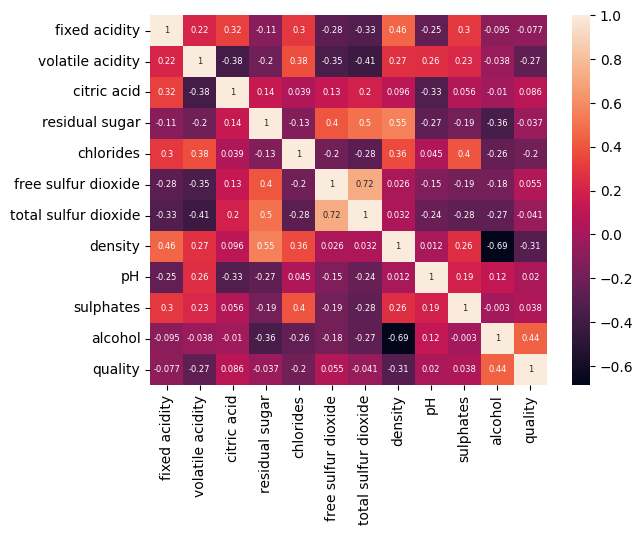

In [49]:
#코드 11-15.데이터 특성 히트맵
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(df_wine_predic.corr(), annot=True, annot_kws={'size':6})
plt.show()

In [50]:
#코드 11-16.테스트 데이터 분할
from sklearn.model_selection import train_test_split

df_wine_predic.columns = df_wine_predic.columns.str.replace(' ', '_')
train, test = train_test_split(df_wine_predic, test_size=0.3, random_state=0,
                               stratify=df_wine_predic['quality'])

train_X = train[train.columns[:11]]
train_Y = train[train.columns[11:]]
test_X = test[test.columns[:11]]
test_Y = test[test.columns[11:]]

In [51]:
#코드 11-17.다중 선형 회귀모형 학습
from statsmodels.formula.api import ols, glm
reg_form = 'quality ~ fixed_acidity + volatile_acidity + citric_acid\
            + residual_sugar + chlorides + free_sulfur_dioxide\
            + total_sulfur_dioxide + density + pH + sulphates + alcohol'
reg_result = ols(reg_form, data=train).fit()

In [52]:
#코드 11-18.다중 선형 회귀모형 예측
reg_predict = reg_result.predict(test)
print(reg_predict)
reg_predict = reg_predict.astype('int')

1209    6.209276
3193    5.647934
1192    6.724634
3852    6.538731
2022    5.294939
          ...   
305     5.485388
1963    5.194879
4305    6.015268
4798    5.933790
1384    4.731303
Length: 1950, dtype: float64


In [53]:
#코드 11-19.예측 정확도
from sklearn import metrics
print('다중 선형회귀 알고리즘 예측 정확도:', metrics.accuracy_score(reg_predict,test_Y))

다중 선형회귀 알고리즘 예측 정확도: 0.4574358974358974


In [54]:
#코드 11-20.랜덤 포레스트 예측
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))

/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



랜덤 포레스트 알고리즘 예측 정확도: 0.6671794871794872


### **2. 심화분석: 인공신경망을 활용하는 와인 등급 예측**

In [55]:
#코드 11-21.케라스 라이브러리
from keras.models import Sequential
from keras.layers import Dense

2025-03-28 11:33:01.078501: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 11:33:01.079556: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 11:33:01.082994: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-28 11:33:01.088809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743129181.098136   19372 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743129181.10

In [56]:
#코드 11-22.인공신경망 틀 정의와 입력층 생성
model = Sequential()
model.add(Dense(64,input_dim=11, activation='relu'))

/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2025-03-28 11:33:02.407272: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [57]:
#코드 11-23.인공신경망의 은닉층 설정
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

In [58]:
#코드 11-24.인공신경망의 출력층 설정
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,575 (13.96 KB)

 Trainable params: 3,575 (13.96 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#코드 11-25.컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# !pip install np_utils

In [62]:
#코드 11-26.원핫 인코딩
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
import np_utils
from tensorflow.keras.utils import to_categorical

#레이블을 학습 데이터 레이블 모형으로 변환하기
encoder = LabelEncoder()
encoder.fit(train_Y)

onehot_train_Y = encoder.transform(train_Y)
train_f_Y = to_categorical(onehot_train_Y)
onehot_test_Y = encoder.transform(test_Y)
test_f_Y = to_categorical(onehot_test_Y)

print(test_f_Y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/clip968/Desktop/programming/ai_security/tf_env/lib64/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [63]:
#코드 11-27.인공신경망 학습
model.fit(train_X, train_f_Y, epochs=500, batch_size=10)

Epoch 1/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.3981 - loss: 2.5248
Epoch 2/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4438 - loss: 1.3064
Epoch 3/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4387 - loss: 1.2706
Epoch 4/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4436 - loss: 1.2278
Epoch 5/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.4450 - loss: 1.2367
Epoch 6/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4592 - loss: 1.1916
Epoch 7/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.4902 - loss: 1.1808
Epoch 8/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.4958 - loss: 1.1701
Epoch 9/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.4742 - loss: 1.2066
Epoch 10/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.4920 - loss: 1.1589
Epoch 11/500
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5085 - loss: 1.1240
Epoch 12/500
455/455 

In [64]:
#코드 11-28.예측 성능 평가
model.evaluate(test_X, test_f_Y)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.5369 - loss: 1.3635


[1.4320141077041626, 0.5487179756164551]